## 聚类分析中常用的距离
### 欧氏距离_有序属性(连续属性)
* 在m维空间中两个点之间的真实距离，或者向量的自然长度（即该点到原点的距离）
* 2维空间,坐标(x1, y1)与坐标(x2, y2)的欧氏距离与自然长度
    * ρ=sqrt((x2-x1)²+(y2-y1)²); 
    * |X|=sqrt（x2²+y2²）
* 3维空间,坐标(x1, y1,z1)与坐标(x2, y2,z2)的欧氏距离与自然长度
    * ρ=sqrt((x2-x1)²+(y2-y1)²+(z2-z1)²);
    * |X|=sqrt（x2²+y2²+z2²）
* n维空间
    * 两个点A=(a[1]，a[2]，…，a[n])和B=(b[1]，b[2]，…，b[n])的欧氏距离
    * ρ(A，B) =sqrt[ ∑( a[i] - b[i] )² ] (i = 1，2，…，n)
    * 向量 x=(x[1]，x[2]，…，x[n]) 的自然长度
    * |x| = sqrt(x[1]²+ x[2]²+ … + x[n]²)

### 曼哈顿距离_有序属性(连续属性)
* 用以标明两个点在标准坐标系上的绝对轴距总和
* 2维空间,两个点（x1, y1），（x2, y2）的曼哈顿距离
    * d = |x1-x2|+|y1-y2|
* n维空间,两个点A=(a[1]，a[2]，…，a[n])和B=(b[1]，b[2]，…，b[n])的曼哈顿距离
    * d = ∑(a[i] - b[i]) (i = 1，2，…，n)

* 距离举例图片

### 闵可夫斯基距离_有序属性(连续属性)
* 闵氏距离是对多个距离度量公式的概括性的表述
* n维空间,两个点A=(a[1]，a[2]，…，a[n])和B=(b[1]，b[2]，…，b[n])的闵可夫斯基距离
   * d = (∑(a[i] - b[i])^p)^(1/p) (i = 1，2，…，n)
* 当p=2时，即为欧氏距离
* 当p=1时，即为曼哈顿距离

### VDM距离_无序属性（离散属性）

* VDM距离是通过计算在某个属性上某种取值的样本数量占比来计算距离

* Mu,a表示在属性u上取值为a的样本数，Mu,a,i表示在第i个样本簇中在属性u上取值为a的样本数,k为样本簇数，则属性u上两个离散值a与b的VDM距离
    * d = ∑((Mu,a,i/Mu,a - Mu,b,i/Mu,b)^p )(i = 1，2，…，k)

In [1]:
from pandas import DataFrame
import pandas as pd
import numpy as np

df = pd.DataFrame({'簇':[1,2,3],'a':[100,200,300],'b':[200,300,400],'c':[300,400,500],})
df

,a,b,c,簇
0,100,200,300,1
1,200,300,400,2
2,300,400,500,3


p=2时，VDM距离如下

a,b的距离：

In [2]:
np.square(100/600-200/900)+np.square(200/600-300/900)+np.square(300/600-400/900)

0.006172839506172843

b,c的距离

In [3]:
np.square(300/1200-200/900)+np.square(400/1200-300/900)+np.square(500/1200-400/900)

0.001543209876543208

a,c的距离

In [4]:
np.square(100/600-300/1200)+np.square(200/600-400/1200)+np.square(300/600-500/1200)

0.013888888888888888

## 混合使用
* 当样本中既包含有序变量有包含无序变量时，可将闵可夫斯基距离与VDM距离混合使用

* 混合距离图片

## 聚类前准备工作－归一化
* 聚类算法在计算距离前，为防止某些数据偏差过大问题，通常会先归一化
* 归一化方法
    * Standardization（zero_score）: 量化后的特征服从标准正态分布，将分布在[-1, 1]区间
        * (x-u)/std,其中u为向量均值，std为标准差
    * Min-Max Scaling： : 量化后的特征分布在[0, 1]区间
        * （x-min）/(max-min)

In [5]:
def normalization(df,var,method='min-max'):
    x = df[var]
    new_var = var + '_norm'
    if method == 'min-max':
        x_min = min(x)
        x_max = max(x)
        d = x_max - x_min
        df[new_var] = [(i - x_min)*1.0/d for i in x]
        del df[var]
    elif method == 'zero-score':
        x_mean = np.mean(x)
        x_std = np.std(x)
        df[new_var] = [(i - x_mean)*1.0 / x_std for i in x]
        del df[var]
    else:
        print('请输入归一化方法')

## k-means算法
* 聚类算法是一种无监督的学习算法，通过对无标记训练样本的学习，将样本划分为若干不相交的样本簇
* k_means算法基本原理
    * 设定k值，并随机选取k个样本作为初始均值向量（质心）
    * 将剩下的样本逐一与上述k各样本进行距离计算，并合并入最小距离的集合中，首次生成簇，并计算每一簇的均值向量
    * 以新的均值向量作为初始均值向量，重复上述过程，直至样本簇不再变化，得到最终的簇划分

### 1、确定k值
* 根据业务设定
* 肘部法则(并不常用）
    * 肘部法则：成本函数最小化
    * 成本函数是各个类畸变程度之和。每个类的畸变程度等于该类重心与其内部成员位置距离的平方和

In [6]:
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn
plt.rcParams['font.family']="SimHei"#显示中文字体
from IPython.core.display import HTML,display
from pandas import DataFrame
import pandas as pd
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [7]:
def get_k(train_data,min_k=1,max_k=10):
    train_array = np.array(train_data)
    K = range(min_k, max_k)
    mean_distortions = []
    for k in K:#遍历K计算畸变
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(train_array)
        mean_distortions.append(sum(np.min(cdist(train_array, kmeans.cluster_centers_, 'euclidean'), axis=1)) / train_data.shape[0])#此处用欧氏距离
    plt.plot(K, mean_distortions, 'bx-')
    plt.xlabel('k取值')
    plt.ylabel('平均畸变程度')
    plt.title('用肘部法则来确定最佳的K值');
    plt.show();
    return mean_distortions

### 2、定义距离函数

In [8]:
def minkovDist(x,y,p=2):
    if p>=1:
#         return sum((x-y)**p)**(1/p)
        return np.linalg.norm(x-y,ord=p)
    else:
        print('p must be larger than or equal to 1')

### 3、定义训练模型函数

In [9]:
def KmensAlgo(train_data,k,p=2):
    # train_data: 训练样本此处为table形式（我日常比较常用）
    # k: 簇数
    # 函数结果：返回两个参数，分别为训练集的分簇结果及质心
    
    train_array = np.array(train_data)
    length = len(train_data)
    # 随机选取k个质心
    random_iloc = random.sample(range(length),k)
    cent = [train_array[i] for i in random_iloc]
    # 定义一个list,用来储存每行所属簇
    position_list = [0]*length
    changed = True
    while changed:
        # 计算每个点到质心的距离，选出最短距离并进行簇归类
        for i in range(length):
            dist_to_cent = [minkovDist(train_array[i],cent_value) for cent_value in cent]
            positin = dist_to_cent.index(min(dist_to_cent))
            position_list[i] = positin
        # 更新质心
        for j in range(k):
            now_position = [l for l in range(length) if position_list[l]==j]
            new_cents = np.mean([train_data.iloc[l] for l in now_position],axis=0)#每簇的数据均值作为新的质心
            if (minkovDist(new_cents,cent[j]))>=0.00001:#检查质心是否变化
                cent[j] = new_cents
                changed=True
            else:
                changed=False
                print(str(j)+'簇质心已更新完毕')
    return position_list,cent

### 4、测试集分类结果

In [10]:
def predit(test_df,cent):
    test_array = np.array(test_df)
    position_list = [0]*len(test_array)
    for i in range(len(test_array)):
        dist_to_cent = [minkovDist(test_array[i],cent_value) for cent_value in cent]
        positin = dist_to_cent.index(min(dist_to_cent))
        position_list[i] = positin
    return position_list

### 5、模型结果

In [11]:
c1 = np.random.uniform(1, 2, (2, 10))
c2 = np.random.uniform(10, 20, (2, 10))
train_data = DataFrame(np.hstack((c1, c2)).T)
train_data

,0,1
0,1.827724,1.865160
1,1.236853,1.138610
2,1.608795,1.163853
3,1.209080,1.924797
4,1.897677,1.130945
5,1.227030,1.612169
6,1.233422,1.880208
7,1.536948,1.081214
8,1.627881,1.856679
9,1.985797,1.730550


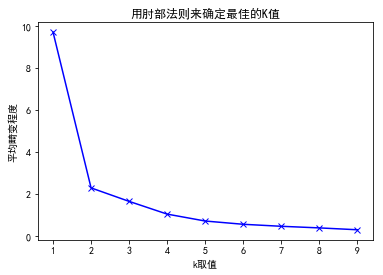

In [12]:
cost = get_k(train_data)

In [13]:
position,cent = KmensAlgo(train_data,k=2,p=2)

0簇质心已更新完毕
1簇质心已更新完毕


In [14]:
position

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [15]:
cent

[array([1.5391208 , 1.53841869]), array([15.26174538, 14.60465772])]

In [16]:
test_df = DataFrame({'a':[1,2,3,20],'b':[3,4,5,18]})

In [17]:
predit(test_df,cent)

[0, 0, 0, 1]